# Logistic Regression

# Agenda

1. Introducing the Pima dataset
    - Reading in the data
    - Analysing the data
2. Logistic regression
    - Form of Logistic regression
    - Building a Logistic regression model
    - Using the model for prediction
	
3. Evaluation
    - Classification Accuracy
    - Null Accuracy
	- Confusion Matrix:
		- Recall(True Positive Rate) - Sensitivty
		- Precision
		- False Positive Rate 
		- specificity
		- Classification Error(Misclassification Rate)
4. Adjusting the classification threshold
    - ROC (Receiver Operating Characteristic Curves)
    - AUC (Area Under Curves)
5. Pros/Cons

**Logistic Regression** is a classification algorithm, used where the dependent response variable is <b>categorical</b>. The idea is to find a relationship between features and <b>probability</b> of particular outcome.

<b>Binomial Logistic Regression:</b>
If the response variable has two values 0 and 1 or pass and fail or true and false.

<b>Multinomial Logistic Regression:</b>
If the response variable can have three or more possible values. For multi-class problem we follow a one v/s all approach.

# PIMA Data
<b>Pima Indians Diabetes Database:</b>
- Machine learning techniques are gaining an increasing significance in the field of medical research especially in the diagnosis of Diabetes. It is estimated that about 415 million people are suffering from this deadly disease, for every 1 in 11 of the world’s adult population.
- This dataset which was originally documented by the National Institute of Diabetes and Digestive and Kidney Diseases, consists of patients of Pima Indian Heritage, exclusively females, above 21 years of age.

<b>Attributes of diabetes.csv:</b>
- Pregnancies: Number of times pregnant
- Glucose: Plasma glucose concentration in an oral glucose tolerance test 
- Blood Pressure: Diastolic blood pressure (mm Hg) 
- Skin Thickness: Triceps skin fold thickness (mm)
- Insulin: 2-Hour serum insulin (mu U/ml)
- BMI: Body mass index (weight in kg/(height in m)^2)
- Diabetes Pedigree Function: Diabetes pedigree function, data on diabetes occurrence history in relatives and the genetic relationship of those relatives to the patient
- Age: Age in years
- Outcome: Class variable (0 or 1)

<b>Objective: </b>
- To predict based on available data whether a patient has diabetes or not 


In [1]:
local_path="C:/Users/s.mudalapuram/Documents/PythonMe/data/"

In [2]:
# read the data into a Pandas DataFrame
import pandas as pd
import numpy as np
#Get data from web
#url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/pima-indians-diabetes/pima-indians-diabetes.data'

#Features
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age','label']
#Load data
pima = pd.read_csv(local_path+"pima-indians-diabetes.csv", header=None, names=col_names)

In [3]:
# print the first 5 rows of data from the dataframe
pima.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
1,6,148,72,35,0,33.6,0.627,50,1
2,1,85,66,29,0,26.6,0.351,31,0
3,8,183,64,0,0,23.3,0.672,32,1
4,1,89,66,23,94,28.1,0.167,21,0


In [4]:
#Droped first row
pima = pima.drop([0])

In [5]:
pima.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
1,6,148,72,35,0,33.6,0.627,50,1
2,1,85,66,29,0,26.6,0.351,31,0
3,8,183,64,0,0,23.3,0.672,32,1
4,1,89,66,23,94,28.1,0.167,21,0
5,0,137,40,35,168,43.1,2.288,33,1


In [6]:
pima.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 768 entries, 1 to 768
Data columns (total 9 columns):
pregnant    768 non-null object
glucose     768 non-null object
bp          768 non-null object
skin        768 non-null object
insulin     768 non-null object
bmi         768 non-null object
pedigree    768 non-null object
age         768 non-null object
label       768 non-null object
dtypes: object(9)
memory usage: 60.0+ KB


All features are object dtype and need to convert int and float

In [7]:
#Sepeating int and flaot colomns
int_col = ['pregnant', 'glucose', 'bp', 'skin', 'insulin','age','label']
float_col = [ 'bmi', 'pedigree']

In [8]:
pima[int_col] = pima[int_col].astype(int)
pima.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 768 entries, 1 to 768
Data columns (total 9 columns):
pregnant    768 non-null int32
glucose     768 non-null int32
bp          768 non-null int32
skin        768 non-null int32
insulin     768 non-null int32
bmi         768 non-null object
pedigree    768 non-null object
age         768 non-null int32
label       768 non-null int32
dtypes: int32(7), object(2)
memory usage: 39.0+ KB


In [9]:
pima[float_col] = pima[float_col].apply(pd.to_numeric,errors='coerce',axis=0)
pima.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 768 entries, 1 to 768
Data columns (total 9 columns):
pregnant    768 non-null int32
glucose     768 non-null int32
bp          768 non-null int32
skin        768 non-null int32
insulin     768 non-null int32
bmi         768 non-null float64
pedigree    768 non-null float64
age         768 non-null int32
label       768 non-null int32
dtypes: float64(2), int32(7)
memory usage: 39.0 KB


In [10]:
#pima.dropna(axis=0,inplace=True)

In [11]:
pima.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
1,6,148,72,35,0,33.6,0.627,50,1
2,1,85,66,29,0,26.6,0.351,31,0
3,8,183,64,0,0,23.3,0.672,32,1
4,1,89,66,23,94,28.1,0.167,21,0
5,0,137,40,35,168,43.1,2.288,33,1


With binary classification, let ‘x’ be some feature and ‘y’ be the output which can be either 0 or 1.
The probability that the output is 1 given its input can be represented as: <b>P(y=1|x)</b>

With Linear Regression, predictor z(x) = $\beta_0$ + $\beta_1$*X. This outcome ranges from positive to negetive infinity.

But outcome probability should be in between 0 and 1. To correct this we have to use LogIt or Odds ratio. 

<b>LogIt Function</b>
ln(P(x)/(1-P(x)) = $\beta_0$ + $\beta_1$*X = z(x)

P(x)/1-P(x) = exp($\beta_0$ + $\beta_1$*X) ==> P(x) = z(x)/(1-z(x))

<b>Inverse Logit Function</b>

sigma(x) = 1/(1+exp(-z(x))



<b>MLE</b>
The maximum likelihood estimate is that set of regression coefficients for which the probability of getting the data we have observed is maximum. 

In [12]:
# Select or define X and y
feature_cols = ['pregnant', 'insulin', 'bmi', 'age']

# X is a matrix, hence we use [] to access the features we want in feature_cols
X = pima[feature_cols]

# y is a vector, hence we use dot to access 'label'
y = pima.label

In [13]:
# split X and y into training and testing sets
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

C:\Users\s.mudalapuram\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [14]:
# train a logistic regression model on the training set
from sklearn.linear_model import LogisticRegression

# instantiate model
logreg = LogisticRegression()

# fit model
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [15]:
# make class predictions for the testing set
y_pred_class = logreg.predict(X_test)


<b>Classification accuracy:</b> Percentage of correct predictions

In [16]:
# calculate accuracy
from sklearn import metrics
print(metrics.accuracy_score(y_test, y_pred_class))

0.6927083333333334


<b>Null accuracy</b>: Accuracy that could be achieved by always predicting the most frequent class.<br>

We must always compare with this. This is similar to Null RMSE that we calculated for our Linear Regression problems. <br>

In [17]:
# examine the class distribution of the testing set (using a Pandas Series method)
y_test.value_counts()

0    130
1     62
Name: label, dtype: int64

In [18]:
# calculate the percentage of ones
# because y_test only contains ones and zeros, we can simply calculate the mean = percentage of ones
y_test.mean()

0.3229166666666667

In [19]:
# calculate the percentage of zeros
1 - y_test.mean()

0.6770833333333333

In [20]:
# calculate null accuracy in a single line of code
# only for binary classification problems coded as 0/1
max(y_test.mean(), 1 - y_test.mean())

0.6770833333333333

In [21]:
# calculate null accuracy (for multi-class classification problems)
y_test.value_counts().head(1) / len(y_test)

0    0.677083
Name: label, dtype: float64

This means that a dumb model that always predicts 0 would be right 68% of the time

This shows how classification accuracy is <b>not that good </b>as it's close to a dumb model.
It's a good way to know the minimum we should achieve with our models

In [22]:
#Comparing the true and predicted response values
# print the first 25 true and predicted responses
print('Test:', y_test.values[0:25])
print('Predicted:', y_pred_class[0:25])

Test: [1 0 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 0 0]
Predicted: [0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]


# Conclusion

<b>Classification accuracy</b> is the easiest classification metric to understand.
But, it does not tell you the underlying distribution of response values.
We examine by calculating the null accuracy.
And, it does not tell you what "types" of errors your classifier is making.

# Confusion Matrix

In [23]:
# IMPORTANT: first argument is true values, second argument is predicted values
# this produces a 2x2 numpy array (matrix)
print(metrics.confusion_matrix(y_test, y_pred_class))
conf=metrics.confusion_matrix(y_test, y_pred_class)

[[118  12]
 [ 47  15]]


In [24]:
import seaborn as sns
cmap = sns.cubehelix_palette(50, hue=0.05, rot=0, light=0.9, dark=0, as_cmap=True)
sns.heatmap(conf,cmap = cmap,xticklabels=[' Predicted 0','Predicted 1'],yticklabels=['Actual 0','Actual 1'],annot=True, fmt="d")

In [25]:
# print the first 25 true and predicted responses
print('True', y_test.values[0:25])
print('Pred', y_pred_class[0:25])

True [1 0 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 0 0]
Pred [0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [26]:
# save confusion matrix and slice into four pieces
confusion = metrics.confusion_matrix(y_test, y_pred_class)
print(confusion)
#[row, column]
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]
print ("TP",TP)
print ("TN",TN)
print("FN",FN)
print ("FP",FP)

[[118  12]
 [ 47  15]]
TP 15
TN 118
FN 47
FP 12


# Metrics computed from a confusion matrix

Classification Accuracy: Overall, how often is the classifier correct?

In [27]:
# use float to perform true division, not integer division
print((TP + TN) / float(TP + TN + FP + FN))
print(metrics.accuracy_score(y_test, y_pred_class))

0.6927083333333334
0.6927083333333334


<b>Classification Error:</b> Overall, how often is the classifier incorrect?

Also known as "Misclassification Rate"

In [28]:
classification_error = (FP + FN) / float(TP + TN + FP + FN)

print(classification_error)
print(1 - metrics.accuracy_score(y_test, y_pred_class))

0.3072916666666667
0.30729166666666663


<b>Sensitivity:</b> When the actual value is positive, how often is the prediction correct?

1.Something we want to maximize <br>
2.How "sensitive" is the classifier to detecting positive instances? <br>
3.Also known as "True Positive Rate" or "Recall" <br>
4.TP / all positive <br>
5.all positive = TP + FN <br>

In [29]:
sensitivity = TP / float(FN + TP)

print(sensitivity)
print(metrics.recall_score(y_test, y_pred_class))

0.24193548387096775
0.24193548387096775


<b>Specificity:</b> When the actual value is negative, how often is the prediction correct? <br>

Something we want to maximize <br>
How "specific" (or "selective") is the classifier in predicting positive instances? <br>
TN / all negative <br>
all negative = TN + FP <br>

In [30]:
specificity = TN / (TN + FP)

print(specificity)

0.9076923076923077


Our classifier: <br>

Highly specific <br>
Not sensitive <br>

<b>False Positive Rate</b>: When the actual value is negative, how often is the prediction incorrect?

In [31]:
false_positive_rate = FP / float(TN + FP)

print(false_positive_rate)
print(1 - specificity)

0.09230769230769231
0.09230769230769231


<b>Precision</b>: When a positive value is predicted, how often is the prediction correct? <br>

How "precise" is the classifier when predicting positive instances?

In [32]:
precision = TP / float(TP + FP)

print(precision)
print(metrics.precision_score(y_test, y_pred_class))

0.5555555555555556
0.5555555555555556


# Conclusion from Confusion Matrix

Confusion matrix gives you a more complete picture of how your classifier is performing <br>
Also allows you to compute various classification metrics, and these metrics can guide your model selection <br>
Which metrics should you focus on?<br>

Choice of metric depends on your business objective <br>
Identify if FP or FN is more important to reduce <br>
Choose metric with relevant variable (FP or FN in the equation) <br>

<b>Spam filter (positive class is "spam"):</b> <br>
Optimize for precision or specificity <br>
precision - false positive as variable <br>
specificity - false positive as variable <br>
Because false negatives (spam goes to the inbox) are more acceptable than false positives (non-spam is caught by the spam filter) <br>

<b>Fraudulent transaction detector (positive class is "fraud"): </b> <br>
Optimize for sensitivity - FN as a variable <br>
Because false positives (normal transactions that are flagged as possible fraud) are more acceptable than false negatives (fraudulent transactions that are not detected) <br>

# Adjusting the classification threshold

In [33]:
# print the first 10 predicted responses
# 1D array (vector) of binary values (0, 1)
logreg.predict(X_test)[0:10]

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1])

In [34]:
# print the first 10 predicted probabilities of class membership
logreg.predict_proba(X_test)[0:10]

array([[0.63247571, 0.36752429],
       [0.71643656, 0.28356344],
       [0.71104114, 0.28895886],
       [0.5858938 , 0.4141062 ],
       [0.84103973, 0.15896027],
       [0.82934844, 0.17065156],
       [0.50110974, 0.49889026],
       [0.48658459, 0.51341541],
       [0.72321388, 0.27678612],
       [0.32810562, 0.67189438]])

In [35]:
# print the first 10 predicted probabilities for class 1
logreg.predict_proba(X_test)[0:10, 1]

array([0.36752429, 0.28356344, 0.28895886, 0.4141062 , 0.15896027,
       0.17065156, 0.49889026, 0.51341541, 0.27678612, 0.67189438])

In [36]:
# store the predicted probabilities for class 1
y_pred_prob = logreg.predict_proba(X_test)[:, 1]

In [37]:
# allow plots to appear in the notebook
%matplotlib inline
import matplotlib.pyplot as plt

# adjust the font size 
plt.rcParams['font.size'] = 12

Text(0,0.5,'Frequency')

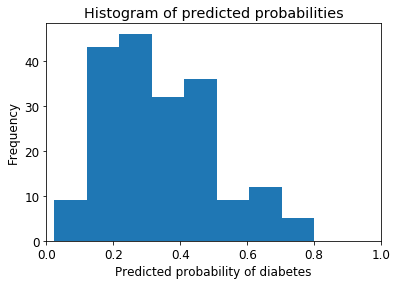

In [38]:
# histogram of predicted probabilities

# 8 bins
plt.hist(y_pred_prob, bins=8)

# x-axis limit from 0 to 1
plt.xlim(0,1)
plt.title('Histogram of predicted probabilities')
plt.xlabel('Predicted probability of diabetes')
plt.ylabel('Frequency')

In [39]:
# predict diabetes if the predicted probability is greater than 0.3
#from sklearn.preprocessing import binarize
# it will return 1 for all values above 0.3 and 0 otherwise
# results are 2D so we slice out the first column
#y_pred_class = binarize(y_pred_prob, 0.3)[0]
y_pred_class = (y_pred_prob > 0.3).astype(int)

In [40]:
y_pred_class

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0])

In [41]:
# print the first 10 predicted probabilities
y_pred_prob[0:10]

array([0.36752429, 0.28356344, 0.28895886, 0.4141062 , 0.15896027,
       0.17065156, 0.49889026, 0.51341541, 0.27678612, 0.67189438])

In [42]:
# print the first 10 predicted classes with the lower threshold
y_pred_class[0:10]

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 1])

In [43]:
# previous confusion matrix (default threshold of 0.5)
print(confusion)

[[118  12]
 [ 47  15]]


In [44]:
# new confusion matrix (threshold of 0.3)
print(metrics.confusion_matrix(y_test, y_pred_class))

[[80 50]
 [16 46]]


In [45]:
# sensitivity has increased (used to be 0.24)
print (46 / float(46 + 16))

0.7419354838709677


In [46]:
# specificity has decreased (used to be 0.91)
print(80 / float(80 + 50))

0.6153846153846154


# Receiver Operating Characteristic (ROC) Curves

<b>Question</b>: Wouldn't it be nice if we could see how sensitivity and specificity are affected by various thresholds, without actually changing the threshold? <br>

<b>Answer</b>: Plot the ROC curve. <br>



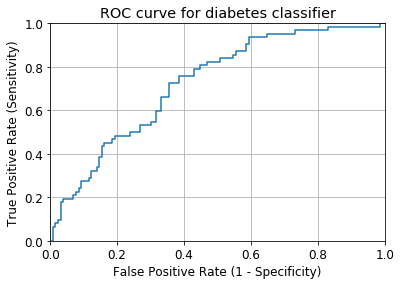

In [47]:
# IMPORTANT: first argument is true values, second argument is predicted probabilities

# we pass y_test and y_pred_prob
# we do not use y_pred_class, because it will give incorrect results without generating an error
# roc_curve returns 3 objects fpr, tpr, thresholds
# fpr: false positive rate
# tpr: true positive rate
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob)

plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve for diabetes classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

In [48]:
thresholds

array([1.80071498, 0.80071498, 0.74087965, 0.69633712, 0.69606825,
       0.67189438, 0.66716947, 0.6645454 , 0.63230508, 0.61736228,
       0.61111541, 0.54263427, 0.54124529, 0.53564034, 0.52224649,
       0.51498521, 0.51341541, 0.50169902, 0.49325079, 0.48716526,
       0.48715682, 0.47865069, 0.47049703, 0.46500093, 0.46376224,
       0.46352874, 0.45467041, 0.45101363, 0.44080614, 0.43928953,
       0.43350689, 0.42654231, 0.42460858, 0.42098599, 0.41744473,
       0.41413913, 0.4141062 , 0.38816583, 0.38409318, 0.3778741 ,
       0.37611662, 0.36961151, 0.36488735, 0.36050235, 0.3484593 ,
       0.34099223, 0.33519541, 0.30918161, 0.29969894, 0.28895886,
       0.28881041, 0.28333693, 0.27954552, 0.27678612, 0.27580041,
       0.27022911, 0.26957602, 0.2531671 , 0.24919104, 0.24880596,
       0.24691412, 0.23738524, 0.23216721, 0.23162338, 0.23014102,
       0.21324812, 0.21320525, 0.19103515, 0.18922131, 0.16122494,
       0.16036979, 0.09743077, 0.05685904, 0.02365251])

ROC curve can help you to choose a threshold that balances sensitivity and specificity in a way that makes sense for your particular contex

# AUC

AUC is the percentage of the ROC plot that is underneath the curve:



In [49]:
# IMPORTANT: first argument is true values, second argument is predicted probabilities
print(metrics.roc_auc_score(y_test, y_pred_prob))

0.7245657568238213


AUC is useful as a single number summary of classifier performance <br>
Higher value = better classifier <br>
If you randomly chose one positive and one negative observation, AUC represents the likelihood that your classifier will assign a higher predicted probability to the positive observation <br>
AUC is useful even when there is high class imbalance (unlike classification accuracy) <br>
Null accuracy in Fraud case - almost 99% <br>
AUC is useful here <br>

In [50]:
# calculate cross-validated AUC
from sklearn.cross_validation import cross_val_score
cross_val_score(logreg, X, y, cv=10, scoring='roc_auc').mean()

0.7378233618233618

Use both of these whenever possible. <br>

<b>Confusion matrix advantages:</b> <br>

Allows you to calculate a variety of metrics <br>
Useful for multi-class problems (more than two response classes) <br>

<b>ROC/AUC advantages: </b><br>

Does not require you to set a classification threshold <br>
Still useful when there is high class imbalance <br>

<b>Pros:</b>
- Simple and efficient.
- Low variance.
- It provides probability score for observations.

<b>Cons:</b>
- Doesn’t handle large number of categorical features/variables well.
- It requires transformation of non-linear features.